# 取出raw data

In [1]:
import xlrd
import matplotlib.pyplot as plt

In [2]:
MRSA_data = xlrd.open_workbook('MRSA_results.xlsx')
Tri_data  = xlrd.open_workbook('Trichomonas_results.xlsx')

algo_order = ['XGB', 'LR', 'SVM', 'RF', 'kNN', 'NN1', 'QNN', 'PNN', 'NN5']
algo_order_i = [4,0,2,3,1,5,7,8,6] 

## Time: data processing

- XLRD一切為0-index!!!
- MRSA:

In [3]:
MRSA_pack = []
sheet_n = 1
for column_n in range(2,20,2):
    table = MRSA_data.sheet_by_index(sheet_n)
    row_n = 10
    raw_data = []
    while(len(raw_data) < 101) & (row_n < 110):
        if type( table.cell(row_n,4).value ) == float:
            raw_data.append( table.cell(row_n,column_n).value )
        row_n = row_n +1
        
#     print(raw_data)
    MRSA_pack.append(raw_data)

 - Trichomonas:

In [4]:
Tri_pack = []
sheet_n = 1
for column_n in range(2,20,2):
    table = Tri_data.sheet_by_index(sheet_n)
    row_n = 10
    raw_data = []
    while(len(raw_data) < 101)& (row_n < 110):
        if type( table.cell(row_n,4).value ) == float:
            raw_data.append( table.cell(row_n,column_n).value )
        row_n = row_n +1
        
#     print(raw_data)
    Tri_pack.append(raw_data)

In [5]:
zip_box = list( zip(MRSA_pack, Tri_pack) )

# Normal: original color

In [6]:
arg_9 = [(116/255,172/255,223/255,1),
         (38/255,136/255,227/255,1),
         (2/255,84/255,162/255,1),
         (0/255,143/255,131/255,1),
         (158/255,158/255,38/255,1),
         (125/255,199/255,128/255,1),
         (204/255,250/255,125/255,1),
         (225/255,215/255,70/255,1),
         (246/255,180/255,14/255,1),]

# Box plot function

In [7]:
def box_plot(zp,
             title, 
             x_label,
             y_label,
             y_limit, # a list with lower and upper bound
             metrics_name,
             classes_name,
             classes_order = None,
             color = arg_9,
             filename = None):
    plt.figure(dpi=300)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    classes = len(zp)
    metrics = len(zp[0])
    if classes_order == None:
        classes_order = [i for i in range(classes)]

    leg_list = []
    for classes_ind in range(classes):
        # setting style for each algorithm
        capStyle_1 = {'color':'black'}
        boxStyle_1 = {'facecolor':color[classes_ind], 'color':color[classes_ind]}
        whiskerStyle_1 = {'color':'black','linewidth':1}
        medianStyle_1 = {'color':'black','linewidth':1}
        meanStyle_1 = dict(marker='s', markeredgecolor='black',
                              markerfacecolor='white')
        flierStyle_1 = dict(marker='o', markeredgecolor='black',
                              markerfacecolor='white')


        for metrics_ind in range(metrics):
            bp = plt.boxplot(zp[ classes_order[classes_ind] ][metrics_ind],
                             positions = [(classes_ind+1) + (classes+1)*metrics_ind], # classes_ind +1是因為 0-index，classes+1是因為類別數還要加上一個空行
                             showmeans=0, #do not show mean
                             showfliers=True, 
                             sym = '',  #空字串代表不顯示fliers, 即便showfliers = True
                             widths =0.8,
                             patch_artist=True,
                             capprops=capStyle_1,
                             boxprops=boxStyle_1,
                             whiskerprops=whiskerStyle_1,
                             medianprops=medianStyle_1,
                             meanprops=meanStyle_1,
                             flierprops=flierStyle_1,)

        # apply 'leg_list' for further legend setting
        leg_list.append(bp['boxes'][0])



    plt.axes().set_title(title)
    plt.axes().set_xlim([0,(classes+1)*metrics])
    plt.axes().set_ylim(y_limit)
    plt.xticks([ 0.5 + classes/2 + (classes+1)*m for m in range(metrics)],metrics_name)
    plt.legend(leg_list, [classes_name[index] for index in range(classes)], loc='upper left',ncol = 3, fontsize='x-small')
#     plt.show() 不要打，圖會無法儲存！
    if filename != None:
        plt.savefig(filename, dpi=300)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

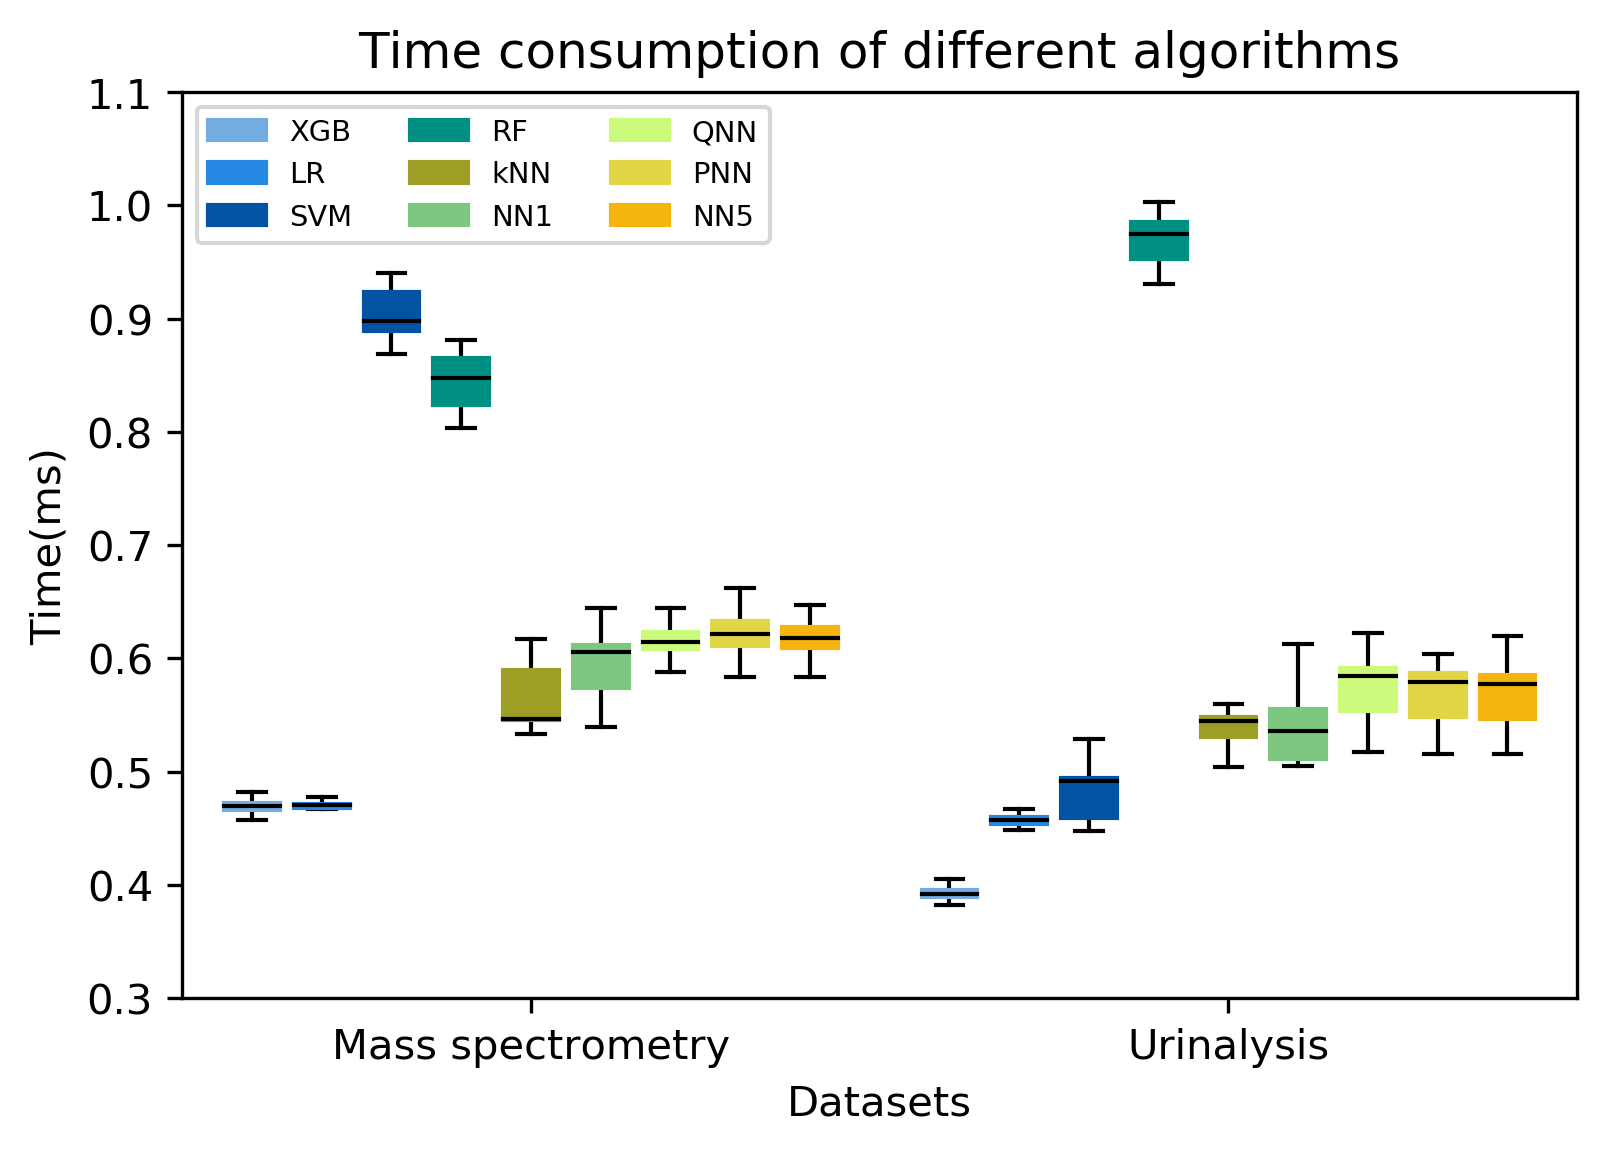

In [8]:
box_plot(zip_box,
         title = 'Time consumption of different algorithms',
         x_label = 'Datasets',
         y_label = 'Time(ms)',
         y_limit = [0.3,1.1],
         metrics_name = ['Mass spectrometry','Urinalysis'],
         classes_name = algo_order,
         classes_order = algo_order_i,
         filename = 'figure4.png',)

# Power: data processing

 - MRSA

In [4]:
MRSA_power_pack = []
sheet_n = 2
for column_n in range(2,20,2):
    table = MRSA_data.sheet_by_index(sheet_n)
    row_n = 10
    raw_data = []
    while(len(raw_data) < 101) & (row_n < 110):
        if type( table.cell(row_n,4).value ) == float:
            raw_data.append( table.cell(row_n,column_n).value )
        row_n = row_n +1
        
#     print(raw_data)
    MRSA_power_pack.append(raw_data)

 - Trichomonas:

In [5]:
Tri_power_pack = []
sheet_n = 2
for column_n in range(2,20,2):
    table = Tri_data.sheet_by_index(sheet_n)
    row_n = 10
    raw_data = []
    while(len(raw_data) < 101)& (row_n < 110):
        if type( table.cell(row_n,4).value ) == float:
            raw_data.append( table.cell(row_n,column_n).value )
        row_n = row_n +1
        
#     print(raw_data)
    Tri_power_pack.append(raw_data)

In [6]:
z_power = list( zip(MRSA_power_pack, Tri_power_pack) )

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

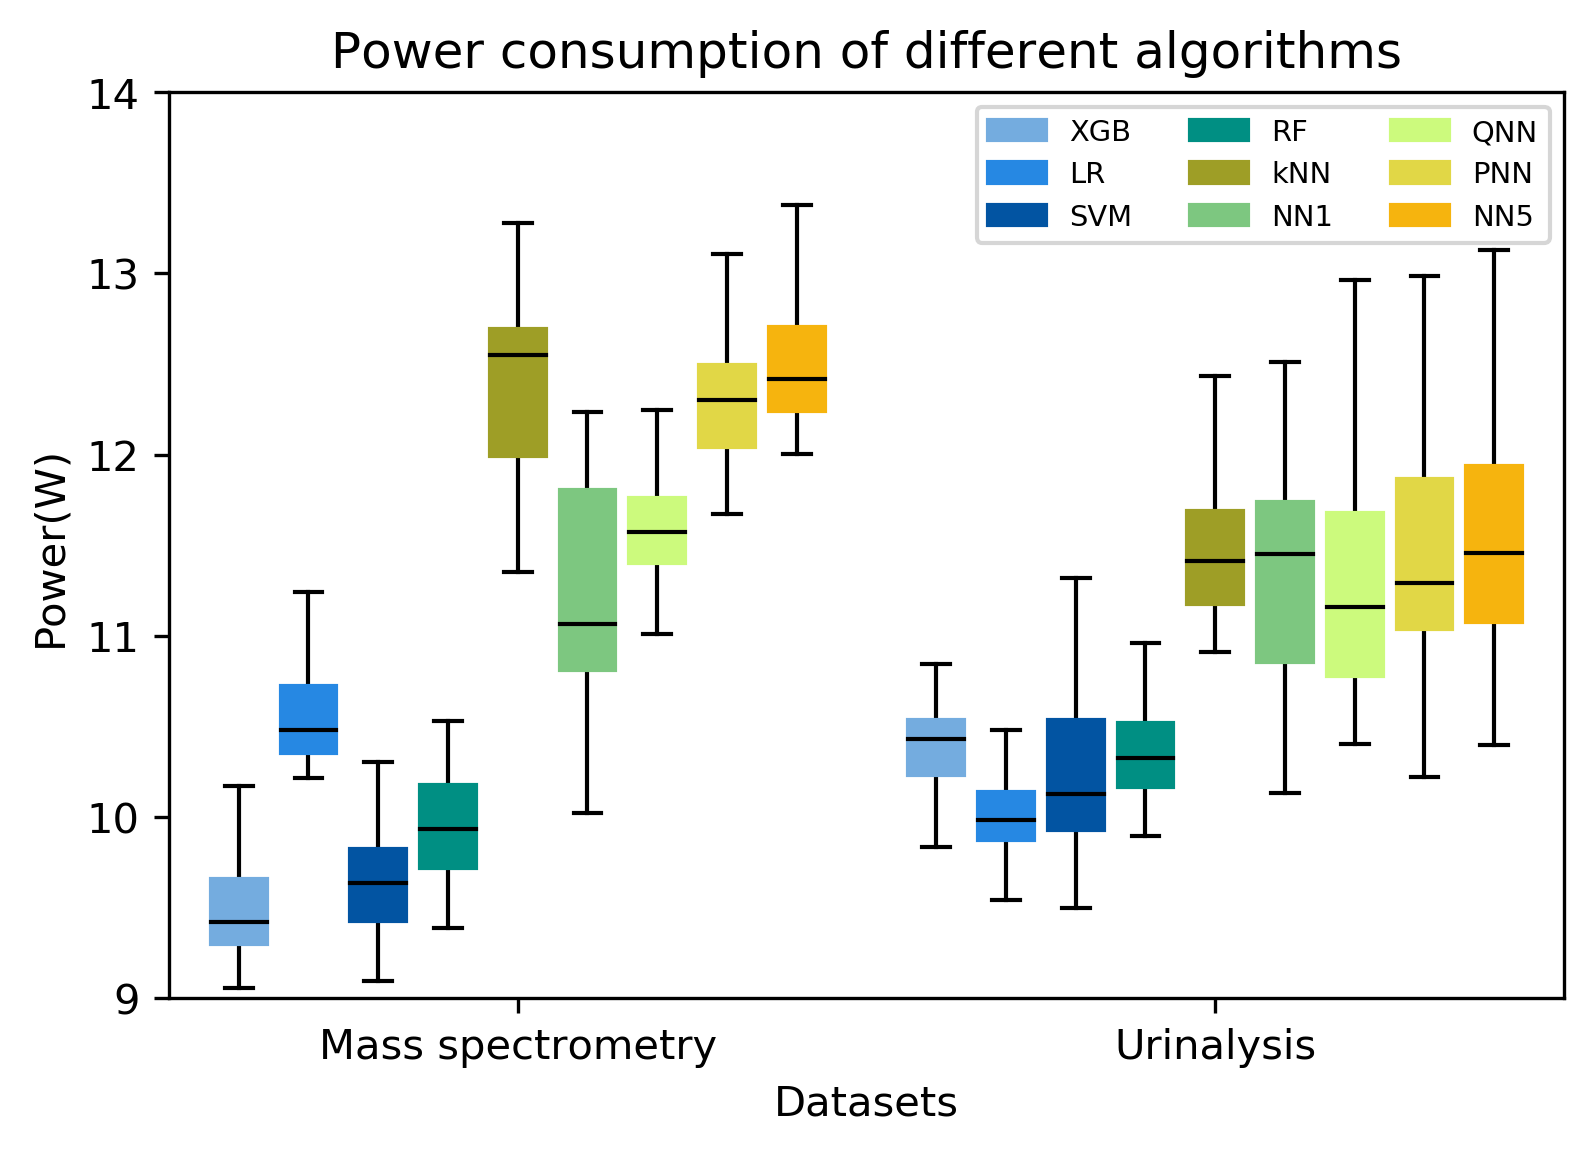

In [14]:
box_plot(z_power,
         title = 'Power consumption of different algorithms',
         x_label = 'Datasets',
         y_label = 'Power(W)',
         y_limit = [9,14],
         metrics_name = ['Mass spectrometry','Urinalysis'],
         classes_name = algo_order,
         classes_order = algo_order_i,
         filename = 'figure5.png',)